This step involves representing the knowledge extracted from the data

In [1]:
import utils
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
import warnings 
warnings.filterwarnings('ignore')

# Load data
df: pd.DataFrame = utils.load_preprocessed_data()

# split data into train and test
_, X_test, _, y_test = utils.split_data(df)

In [2]:
# Loading the best classifier (xgboost)
xgb_classifier = pd.read_pickle('../artifacts/xgb_classifier.pkl')

# Predicting the Test set results
y_pred = xgb_classifier.predict(X_test)

In [3]:
f1_score = f1_score(y_test, y_pred, average="weighted")
acccuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average="weighted")
precision = precision_score(y_test, y_pred, average="weighted")


print("*************** \n Gradient Boosting Results \n***************")
print("F1 Score    : ", f1_score)
print("Accuracy    : ", acccuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)

*************** 
 Gradient Boosting Results 
***************
F1 Score    :  0.9408985194486272
Accuracy    :  0.9413145539906104
Recall      :  0.9413145539906104
Precision   :  0.940587972278113


In [4]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       335
           1       0.79      0.76      0.78        50
           2       0.93      0.95      0.94        41

    accuracy                           0.94       426
   macro avg       0.89      0.89      0.89       426
weighted avg       0.94      0.94      0.94       426



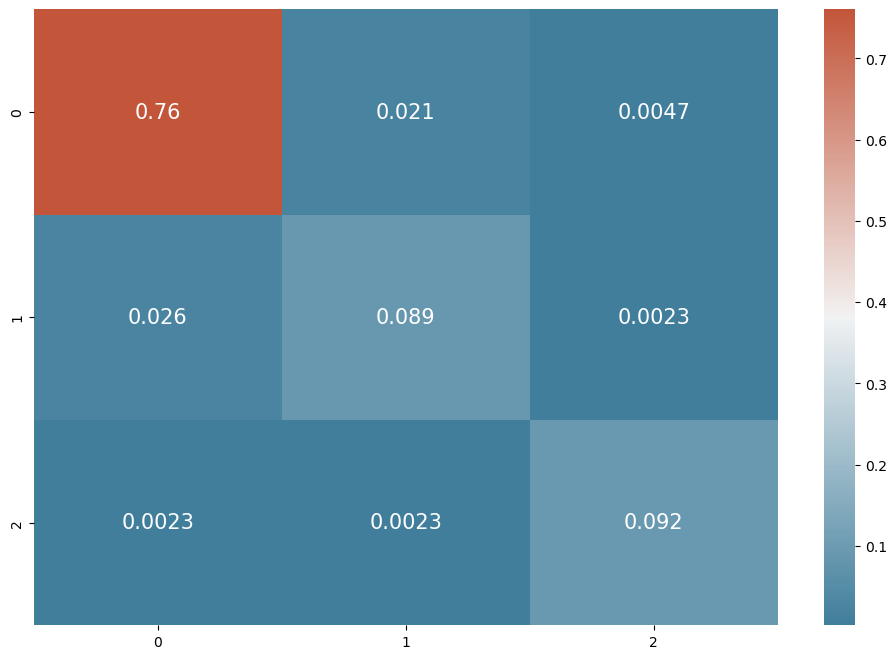

In [5]:
# confusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=cmap,annot = True, annot_kws = {'size':15})
plt.show()